# Calculate the porphyrin dimensions

In [56]:
from math import cos, radians

def average(num_1, num_2 = None):
    if type(num_1) is list:
        return sum(num_1) / len(num_1)
    else:
        if num_2 is not None:
            numbers = [num_1, num_2]
            average = sum(numbers) / len(numbers)
            return average
        else:
            return num_1
        
# chemical dimensions in Angstroms (as the averages from https://en.wikipedia.org/wiki/Bond_length) and degrees
chemical_dimensions = {
    'bond':{
        'c-c':average(1.2,1.54),
#         'c-h':average(1.06,1.12),
        'c-n':average(1.47,2.1),
#         'c-f':average(1.34),
#         'n=n':average(1.23) # https://doi.org/10.1016/B978-0-08-101033-4.00003-6
    },
    'angle':{
        'sp3':109.5,
        'sp2':120
    }
}

# abbreviate dimensions
cc_bond = chemical_dimensions['bond']['c-c']
cn_bond = chemical_dimensions['bond']['c-n']
mostly_forward_sp2 = cos(radians(chemical_dimensions['angle']['sp2']-90))
less_forward_sp2 = cos(radians(180-chemical_dimensions['angle']['sp2']))

# calculate the total molecular length & width
center_porphyrin_length = 3*(cc_bond*(mostly_forward_sp2 + less_forward_sp2))
sp2_extension = (cc_bond * (2 + less_forward_sp2) + cn_bond * (1 + less_forward_sp2))
total_length = sp2_extension + center_porphyrin_length
print(total_length, 'Angstroms')

11.716864409554045 Angstroms


# Define and execute the solution simulation

,oxidation,excitation,log10-oxidation,log10-excitation
Time (h),,,,
0.050209,0.270372,0.936667,0.136898,1.198367
0.100418,0.459258,0.936650,0.267010,1.198256
0.150628,0.594788,0.936634,0.392318,1.198144
0.200837,0.693910,0.936618,0.514151,1.198033
0.251046,0.767416,0.936602,0.633420,1.197921
...,...,...,...,...
4.669456,1.000000,0.935172,10.311610,1.188241
4.719665,1.000000,0.935156,10.451967,1.188132
4.769874,1.000000,0.935140,10.617530,1.188023


,parameter,value
0,so_diffusion_m,8.0000E-8
1,timestep_s,1.8000E2
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,solution_depth_m,1.2670E-2
4,solution_sqr_m,1.9300E-4
5,solution_cub_m,2.4453E-6
6,bacterial_cfu_ml,1.0000E8
7,biofilm,False
8,bacterial_specie,S_aureus
9,surface_system,False


,variable,value
0,fa_gL_conc,9.1352E-1
1,fa_molar,1.0976E-2
2,molecular_volume_cub_m,1.2674E-27
3,photosensitizer_molar,5.0000E-6
4,photosensitizers,7.3630E15
5,volume_proportion,3.8164E-6
6,photon_moles_per_timestep,2.6330E-6
7,hv_photobleaching_s,4.1667E-1
8,so_decay_time_s,6.0000E-5
9,k_fa,2.1924E2


,oxidation,excitation,log10-oxidation,log10-excitation,log10-inactivation,inactivation
Time (h),,,,,,
0.050209,0.270372,0.936667,0.136898,1.198367,4.636898,0.270372
0.100418,0.459258,0.936650,0.267010,1.198256,4.767010,0.459258
0.150628,0.594788,0.936634,0.392318,1.198144,4.892318,0.594788
0.200837,0.693910,0.936618,0.514151,1.198033,5.014151,0.693910
0.251046,0.767416,0.936602,0.633420,1.197921,5.133420,0.767416
...,...,...,...,...,...,...
4.669456,1.000000,0.935172,10.311610,1.188241,14.811610,1.000000
4.719665,1.000000,0.935156,10.451967,1.188132,14.951967,1.000000
4.769874,1.000000,0.935140,10.617530,1.188023,15.117530,1.000000


hours to target: 1.3556485355648535
hours to target: 1.3556485355648535
--> ERROR: The prediction of 1.3556485355648535 is not within the 0.8+/-0.4 tolerance of the actual value.
A 59.529411764705884%-error







,oxidation,excitation,log10-oxidation,log10-excitation
Time (h),,,,
0.050209,0.468695,0.936650,0.274656,1.198256
0.100418,0.711043,0.936618,0.539166,1.198033
0.150628,0.840901,0.936585,0.798333,1.197810
0.200837,0.911815,0.936553,1.054608,1.197587
0.251046,0.950942,0.936520,1.309292,1.197365
0.301255,0.972653,0.936488,1.563092,1.197142
0.351464,0.984738,0.936455,1.816396,1.196920
0.401674,0.991477,0.936423,2.069419,1.196698
0.451883,0.995239,0.936390,2.322282,1.196476


,parameter,value
0,so_diffusion_m,8.0000E-8
1,timestep_s,1.8000E2
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,solution_depth_m,1.2670E-2
4,solution_sqr_m,1.9300E-4
5,solution_cub_m,2.4453E-6
6,bacterial_cfu_ml,1.0000E8
7,biofilm,False
8,bacterial_specie,S_aureus
9,surface_system,False


,variable,value
0,fa_gL_conc,9.1352E-1
1,fa_molar,1.0976E-2
2,molecular_volume_cub_m,1.2674E-27
3,photosensitizer_molar,1.0000E-5
4,photosensitizers,14726001021835598.0
5,volume_proportion,7.6327E-6
6,photon_moles_per_timestep,2.6330E-6
7,hv_photobleaching_s,4.1667E-1
8,so_decay_time_s,6.0000E-5
9,k_fa,2.1924E2


,oxidation,excitation,log10-oxidation,log10-excitation,log10-inactivation,inactivation
Time (h),,,,,,
0.050209,0.468695,0.936650,0.274656,1.198256,4.774656,0.468695
0.100418,0.711043,0.936618,0.539166,1.198033,5.039166,0.711043
0.150628,0.840901,0.936585,0.798333,1.197810,5.298333,0.840901
0.200837,0.911815,0.936553,1.054608,1.197587,5.554608,0.911815
0.251046,0.950942,0.936520,1.309292,1.197365,5.809292,0.950942
0.301255,0.972653,0.936488,1.563092,1.197142,6.063092,0.972653
0.351464,0.984738,0.936455,1.816396,1.196920,6.316396,0.984738
0.401674,0.991477,0.936423,2.069419,1.196698,6.569419,0.991477
0.451883,0.995239,0.936390,2.322282,1.196476,6.822282,0.995239


hours to target: 0.6527196652719666
hours to target: 0.6527196652719666
The prediction of 0.6527196652719666 is within the 0.8+/-0.4 tolerance of the actual value.
A -23.176470588235297%-error







,oxidation,excitation,log10-oxidation,log10-excitation
Time (h),,,,
0.050209,0.719507,0.936618,0.552078,1.198033
0.100418,0.919159,0.936553,1.092368,1.197587
0.150628,0.976520,0.936488,1.629307,1.197142
0.200837,0.993165,0.936423,2.165250,1.196698
0.251046,0.998009,0.936358,2.700877,1.196254
0.301255,0.999420,0.936293,3.236384,1.195810
0.351464,0.999831,0.936228,3.771828,1.195367
0.401674,0.999951,0.936163,4.307226,1.194925
0.451883,0.999986,0.936098,4.842582,1.194483


,parameter,value
0,so_diffusion_m,8.0000E-8
1,timestep_s,1.8000E2
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,solution_depth_m,1.2670E-2
4,solution_sqr_m,1.9300E-4
5,solution_cub_m,2.4453E-6
6,bacterial_cfu_ml,1.0000E8
7,biofilm,False
8,bacterial_specie,S_aureus
9,surface_system,False


,variable,value
0,fa_gL_conc,9.1352E-1
1,fa_molar,1.0976E-2
2,molecular_volume_cub_m,1.2674E-27
3,photosensitizer_molar,2.0000E-5
4,photosensitizers,29452002043671196.0
5,volume_proportion,1.5265E-5
6,photon_moles_per_timestep,2.6330E-6
7,hv_photobleaching_s,4.1667E-1
8,so_decay_time_s,6.0000E-5
9,k_fa,2.1924E2


,oxidation,excitation,log10-oxidation,log10-excitation,log10-inactivation,inactivation
Time (h),,,,,,
0.050209,0.719507,0.936618,0.552078,1.198033,5.052078,0.719507
0.100418,0.919159,0.936553,1.092368,1.197587,5.592368,0.919159
0.150628,0.976520,0.936488,1.629307,1.197142,6.129307,0.976520
0.200837,0.993165,0.936423,2.165250,1.196698,6.665250,0.993165
0.251046,0.998009,0.936358,2.700877,1.196254,7.200877,0.998009
0.301255,0.999420,0.936293,3.236384,1.195810,7.736384,0.999420
0.351464,0.999831,0.936228,3.771828,1.195367,8.271828,0.999831
0.401674,0.999951,0.936163,4.307226,1.194925,8.807226,0.999951
0.451883,0.999986,0.936098,4.842582,1.194483,9.342582,0.999986


hours to target: 0.301255230125523
hours to target: 0.301255230125523
The prediction of 0.301255230125523 is within the 0.50+/-0.25 tolerance of the actual value.
A -39.800000000000004%-error







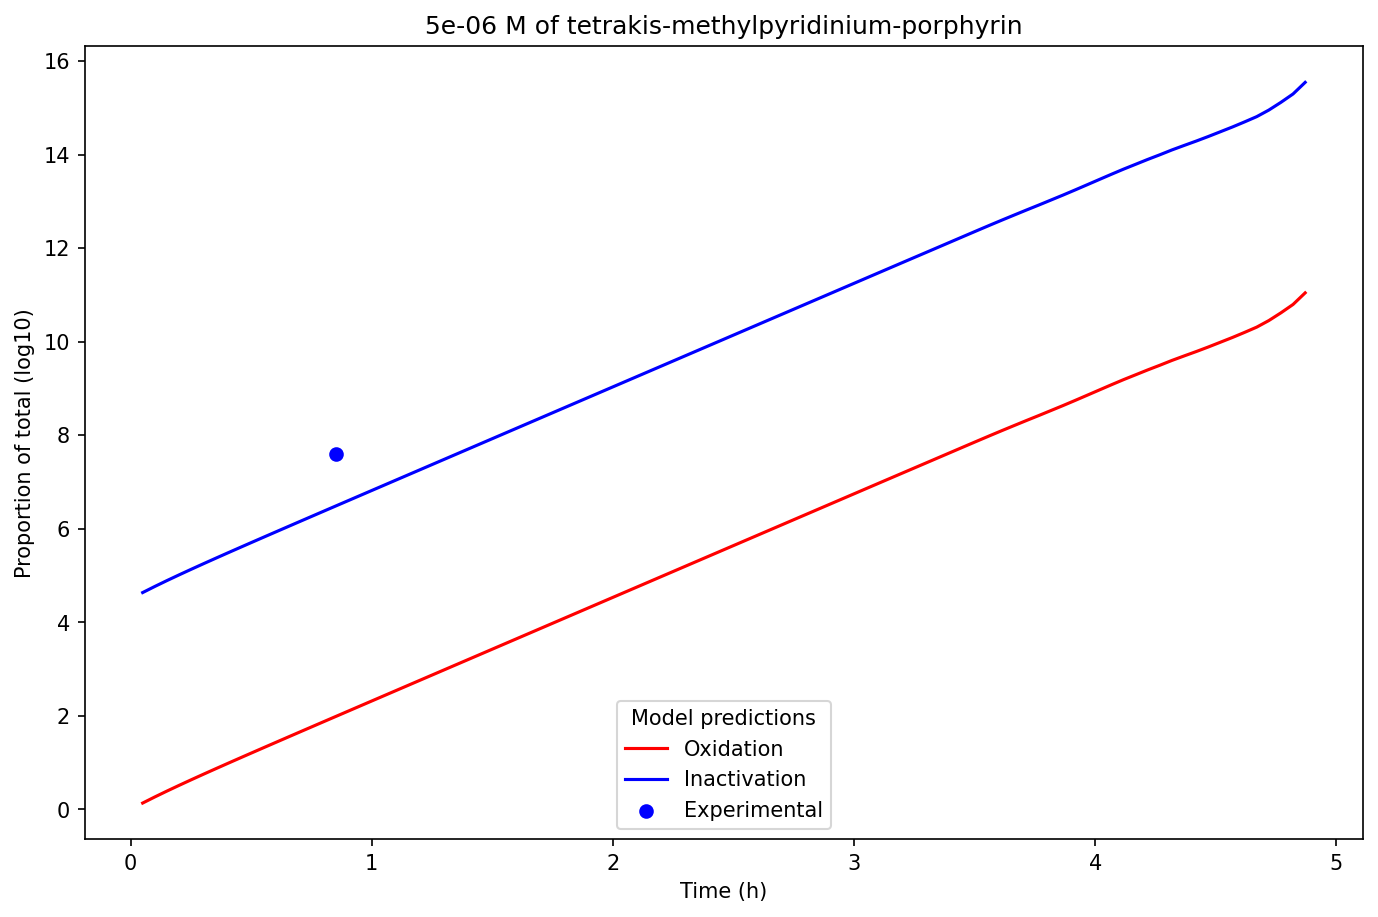

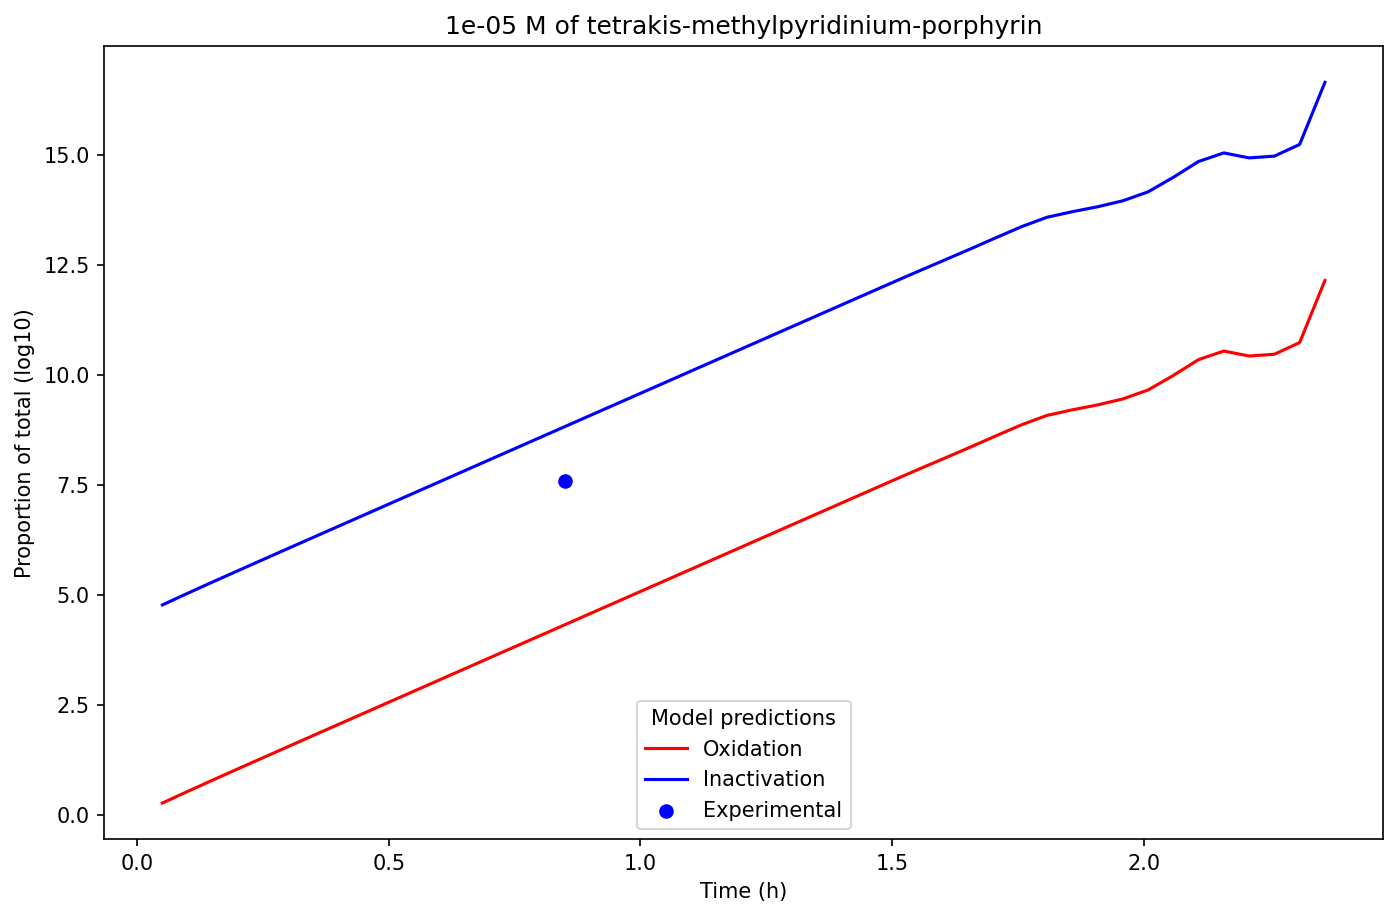

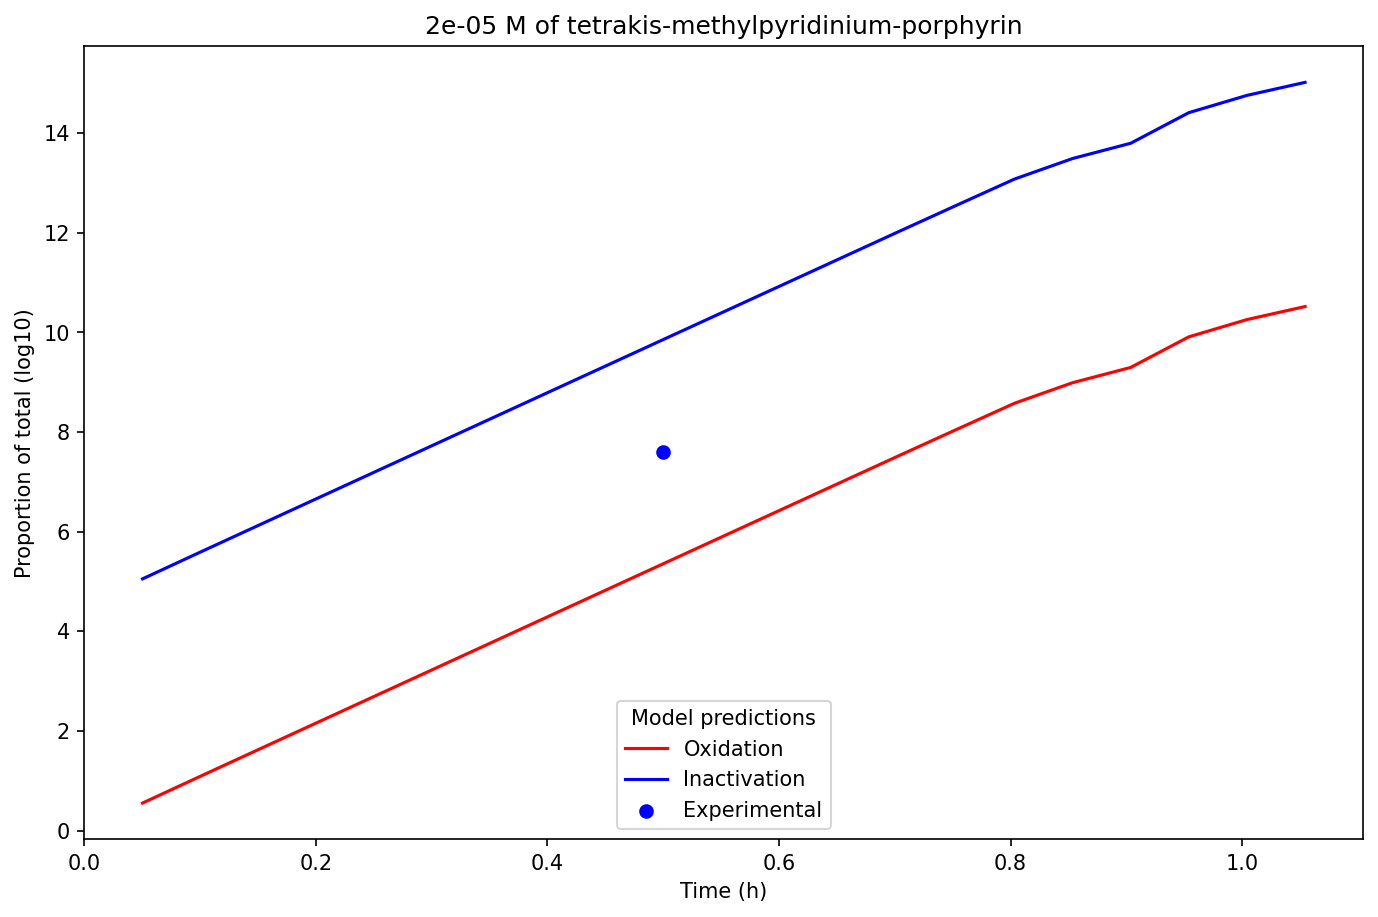

In [65]:
from scipy.constants import micro
from uncertainties import ufloat
from sigfig import round
from math import isclose
%run ../../pdipy/pdi.py
%matplotlib inline

# execute the simulation
target_reduction = 7.6
for photosensitizer_molar in [5*micro, 10*micro, 20*micro]:  
    figure_title = f'{round(photosensitizer_molar, 3)} M of tetrakis-methylpyridinium-porphyrin'
    # determine the experimental result
    if photosensitizer_molar == 20*micro:
        actual_value = 0.5          
    elif photosensitizer_molar == 5*micro:
        actual_value = 0.85
    elif photosensitizer_molar == 10*micro:
        actual_value = 0.85
        
    # execute the simulation
    pdi = PDI(verbose = False, jupyter = True)
    pdi.define_conditions(
        bacterial_specie = 'S_aureus', 
        bacterial_cfu_ml = 1E8,
        photosensitizer = '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide', 
        photosensitizer_characteristics = {
            'formula': {
                'value': 'C44_H38_N8_I4'   # mass with iodides included, sans iodides 678.84,
            },
            'dimensions':{
                'length (A)': total_length,
                'width (A)': total_length,
                'depth (A)': 1.5,
                'shape': 'disc',
            }
        },
        photosensitizer_molar = photosensitizer_molar,
        light_source = 'OSRAM 2\' 18W/840 lamps',
        light_characteristics = {
            "visible_proportion": {
              "value": (700-390)/(700-380),
            }
        }, 
        measurement = {
            'irradiance': 4
        }
    )
    pdi.simulate(
        export_name = f'Beirao_et_al, {int(photosensitizer_molar/micro)} uM solution',
        figure_title = figure_title,
        experimental_data = {
            'x': [actual_value],
            'y': [target_reduction]
        },
        display_fa_oxidation = True,
        export_contents = True
    )
    display(pdi.processed_data)

    # affirm the accuracy of the prediction
    value, unit = pdi.parse_data(target_reduction)    
    if value is not None:
        tolerance = actual_value/2
        acceptable_range_float = ufloat(actual_value, tolerance)
        if isclose(value, actual_value, abs_tol=tolerance):
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_value, 3)/actual_value*100}%-error')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_value, 3)/actual_value*100}%-error')
    else:
        print('--> ERROR: The value was never observed in the simulation predictions.')
    print('\n\n\n\n')

# Define and execute the biofilm simulation

,oxidation,excitation,log10-oxidation,log10-excitation
Time (h),,,,
0.050209,0.024621,0.936667,0.010826,1.198367
0.100418,0.048474,0.936650,0.021580,1.198256
0.150628,0.071593,0.936634,0.032262,1.198144
0.200837,0.094007,0.936618,0.042875,1.198033
0.251046,0.115743,0.936602,0.053422,1.197922
...,...,...,...,...
11.799163,0.989530,0.932879,1.980059,1.173143
11.849372,0.989718,0.932863,1.987905,1.173039
11.899582,0.989902,0.932847,1.995749,1.172935


,parameter,value
0,so_diffusion_m,8.0000E-8
1,timestep_s,1.8000E2
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,solution_depth_m,1.2670E-2
4,solution_sqr_m,1.9300E-4
5,solution_cub_m,2.4453E-6
6,bacterial_cfu_ml,1.0000E8
7,biofilm,True
8,bacterial_specie,S_aureus
9,surface_system,False


,variable,value
0,fa_gL_conc,9.1352E-1
1,fa_molar,1.0976E-2
2,cell_radius_m,6.0676E-5
3,membrane_cub_m,1.8504E-16
4,fa_mass_proportion,1.6130E-1
5,molecular_volume_cub_m,1.2674E-27
6,photosensitizer_molar,5.0000E-6
7,photosensitizers,7.3630E15
8,volume_proportion,3.8164E-6
9,photon_moles_per_timestep,2.6330E-6


,oxidation,excitation,log10-oxidation,log10-excitation,log10-inactivation
Time (h),,,,,
0.050209,0.024621,0.936667,0.010826,1.198367,2.860838
0.100418,0.048474,0.936650,0.021580,1.198256,2.871591
0.150628,0.071593,0.936634,0.032262,1.198144,2.882273
0.200837,0.094007,0.936618,0.042875,1.198033,2.892887
0.251046,0.115743,0.936602,0.053422,1.197922,2.903433
...,...,...,...,...,...
11.799163,0.989530,0.932879,1.980059,1.173143,4.830071
11.849372,0.989718,0.932863,1.987905,1.173039,4.837916
11.899582,0.989902,0.932847,1.995749,1.172935,4.845761


hours to target: 4.117154811715481
hours to target: 4.117154811715481
The prediction of 4.117154811715481 is within the 4.5+/-2.2 tolerance of the actual value.
A -8.511111111111111%-error







,oxidation,excitation,log10-oxidation,log10-excitation
Time (h),,,,
0.050209,0.048636,0.936650,0.021653,1.198256
0.100418,0.094608,0.936618,0.043163,1.198033
0.150628,0.138090,0.936585,0.064538,1.197810
0.200837,0.179243,0.936553,0.085785,1.197588
0.251046,0.218212,0.936520,0.106911,1.197366
...,...,...,...,...
11.799163,0.999964,0.929104,4.446194,1.149378
11.849372,0.999966,0.929072,4.464759,1.149182
11.899582,0.999967,0.929040,4.483324,1.148986


,parameter,value
0,so_diffusion_m,8.0000E-8
1,timestep_s,1.8000E2
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,solution_depth_m,1.2670E-2
4,solution_sqr_m,1.9300E-4
5,solution_cub_m,2.4453E-6
6,bacterial_cfu_ml,1.0000E8
7,biofilm,True
8,bacterial_specie,S_aureus
9,surface_system,False


,variable,value
0,fa_gL_conc,9.1352E-1
1,fa_molar,1.0976E-2
2,cell_radius_m,6.0676E-5
3,membrane_cub_m,1.8504E-16
4,fa_mass_proportion,1.6130E-1
5,molecular_volume_cub_m,1.2674E-27
6,photosensitizer_molar,1.0000E-5
7,photosensitizers,14726001021835598.0
8,volume_proportion,7.6327E-6
9,photon_moles_per_timestep,2.6330E-6


,oxidation,excitation,log10-oxidation,log10-excitation,log10-inactivation
Time (h),,,,,
0.050209,0.048636,0.936650,0.021653,1.198256,2.871665
0.100418,0.094608,0.936618,0.043163,1.198033,2.893175
0.150628,0.138090,0.936585,0.064538,1.197810,2.914550
0.200837,0.179243,0.936553,0.085785,1.197588,2.935797
0.251046,0.218212,0.936520,0.106911,1.197366,2.956923
...,...,...,...,...,...
11.799163,0.999964,0.929104,4.446194,1.149378,7.296205
11.849372,0.999966,0.929072,4.464759,1.149182,7.314771
11.899582,0.999967,0.929040,4.483324,1.148986,7.333336


hours to target: 5.623430962343096
hours to target: 5.623430962343096
The prediction of 5.623430962343096 is within the 4.5+/-2.2 tolerance of the actual value.
A 24.88888888888889%-error







,oxidation,excitation,log10-oxidation,log10-excitation
Time (h),,,,
0.050209,0.094911,0.936618,0.043309,1.198033
0.100418,0.180298,0.936553,0.086344,1.197588
0.150628,0.257209,0.936488,0.129134,1.197144
0.200837,0.326560,0.936423,0.171701,1.196700
0.251046,0.389155,0.936358,0.214069,1.196257
...,...,...,...,...
11.799163,1.000000,0.921643,9.240768,1.105919
11.849372,1.000000,0.921580,9.268928,1.105570
11.899582,1.000000,0.921517,9.298486,1.105222


,parameter,value
0,so_diffusion_m,8.0000E-8
1,timestep_s,1.8000E2
2,root_path,C:\Users\Andrew Freiburger\Dropbox\My PC (DESKTOP-M302P50)\Documents\UVic Civil Engineering\PDIpy\PDIpy\pdipy
3,solution_depth_m,1.2670E-2
4,solution_sqr_m,1.9300E-4
5,solution_cub_m,2.4453E-6
6,bacterial_cfu_ml,1.0000E8
7,biofilm,True
8,bacterial_specie,S_aureus
9,surface_system,False


,variable,value
0,fa_gL_conc,9.1352E-1
1,fa_molar,1.0976E-2
2,cell_radius_m,6.0676E-5
3,membrane_cub_m,1.8504E-16
4,fa_mass_proportion,1.6130E-1
5,molecular_volume_cub_m,1.2674E-27
6,photosensitizer_molar,2.0000E-5
7,photosensitizers,29452002043671196.0
8,volume_proportion,1.5265E-5
9,photon_moles_per_timestep,2.6330E-6


,oxidation,excitation,log10-oxidation,log10-excitation,log10-inactivation
Time (h),,,,,
0.050209,0.094911,0.936618,0.043309,1.198033,2.893320
0.100418,0.180298,0.936553,0.086344,1.197588,2.936356
0.150628,0.257209,0.936488,0.129134,1.197144,2.979145
0.200837,0.326560,0.936423,0.171701,1.196700,3.021713
0.251046,0.389155,0.936358,0.214069,1.196257,3.064081
...,...,...,...,...,...
11.799163,1.000000,0.921643,9.240768,1.105919,12.090779
11.849372,1.000000,0.921580,9.268928,1.105570,12.118939
11.899582,1.000000,0.921517,9.298486,1.105222,12.148497


hours to target: 4.2677824267782425
hours to target: 4.2677824267782425
The prediction of 4.2677824267782425 is within the 4.5+/-2.2 tolerance of the actual value.
A -5.155555555555556%-error







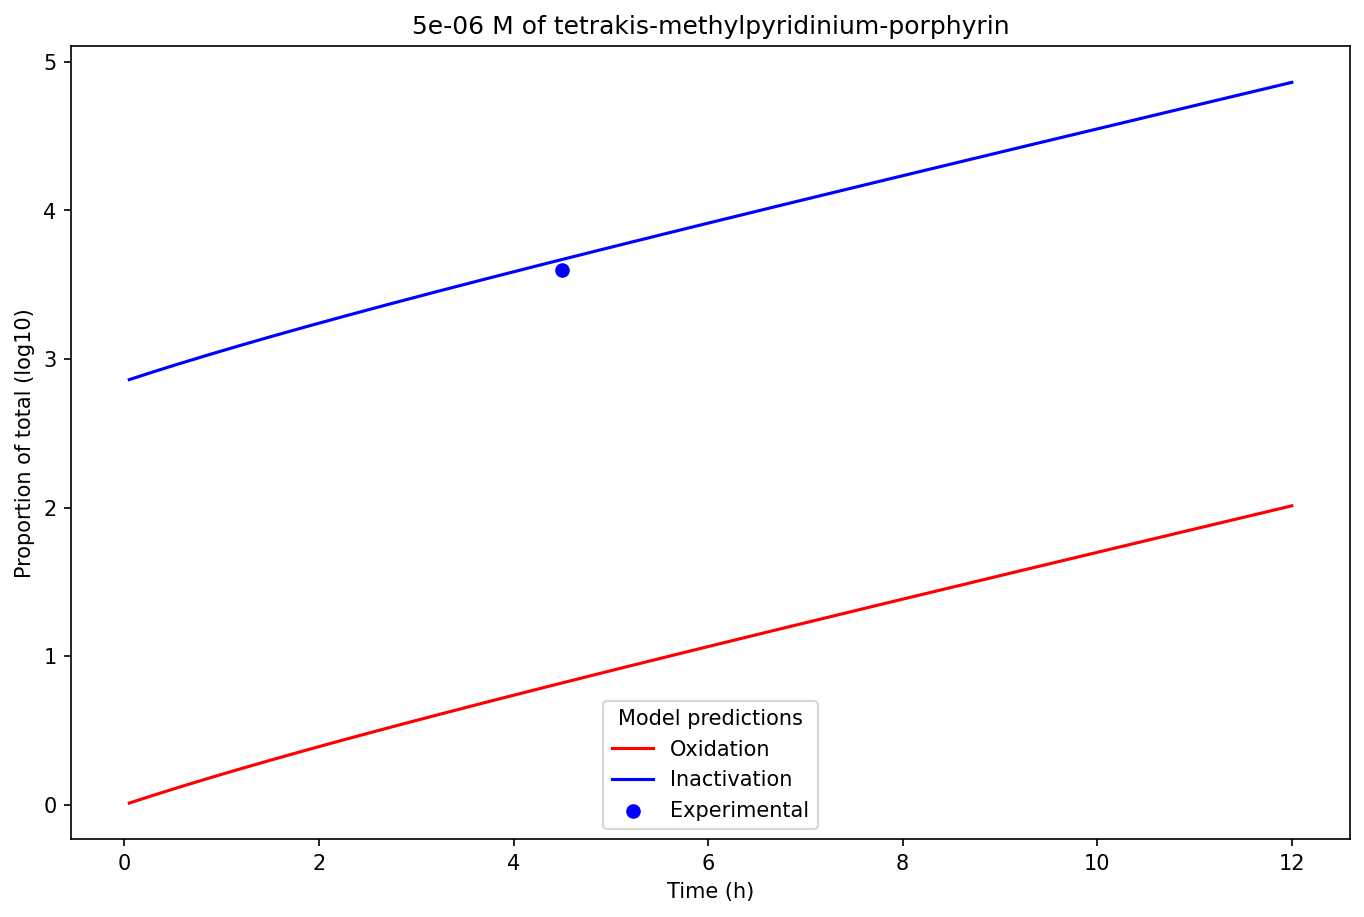

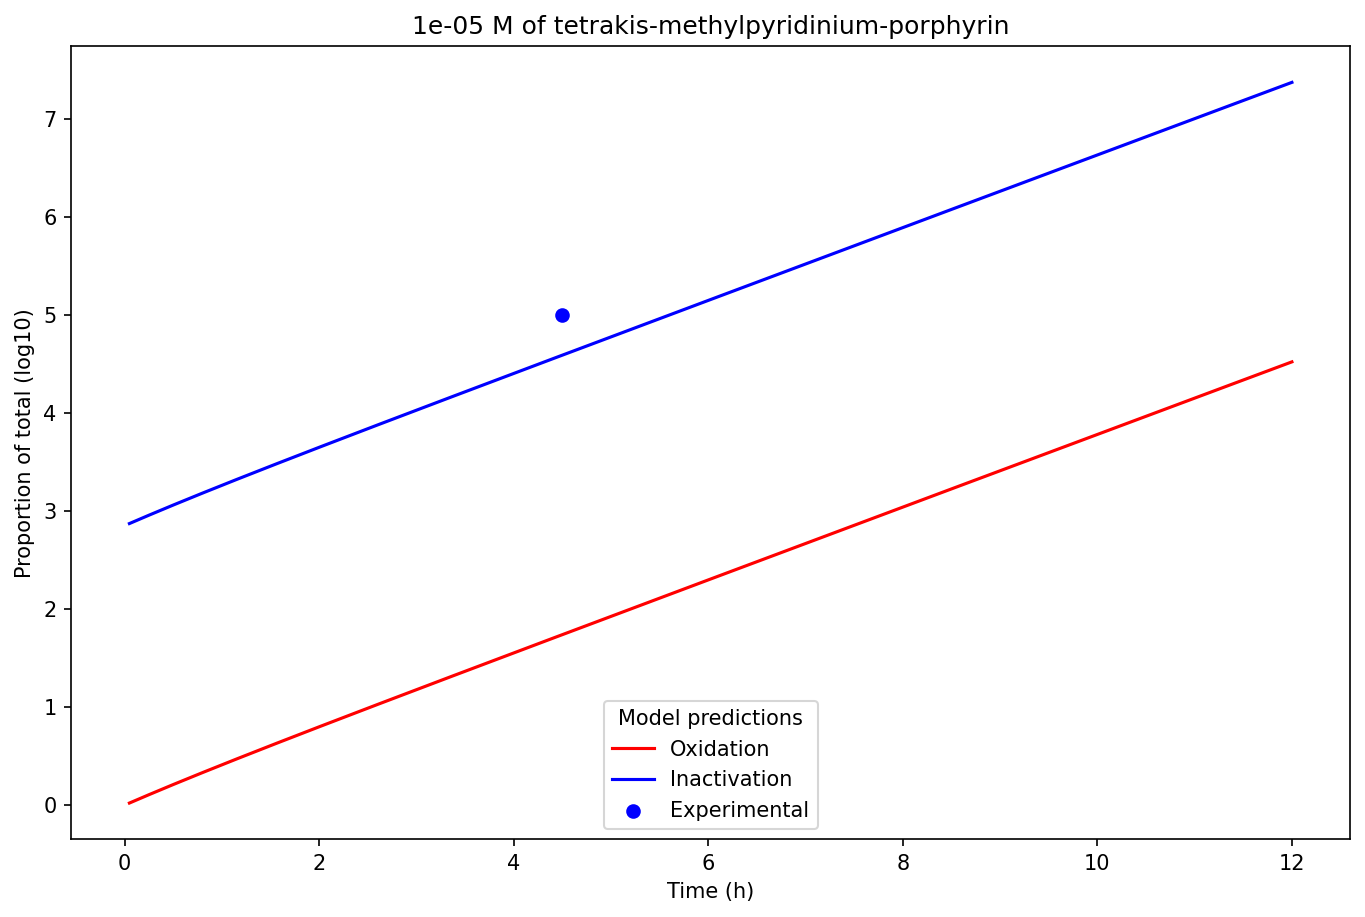

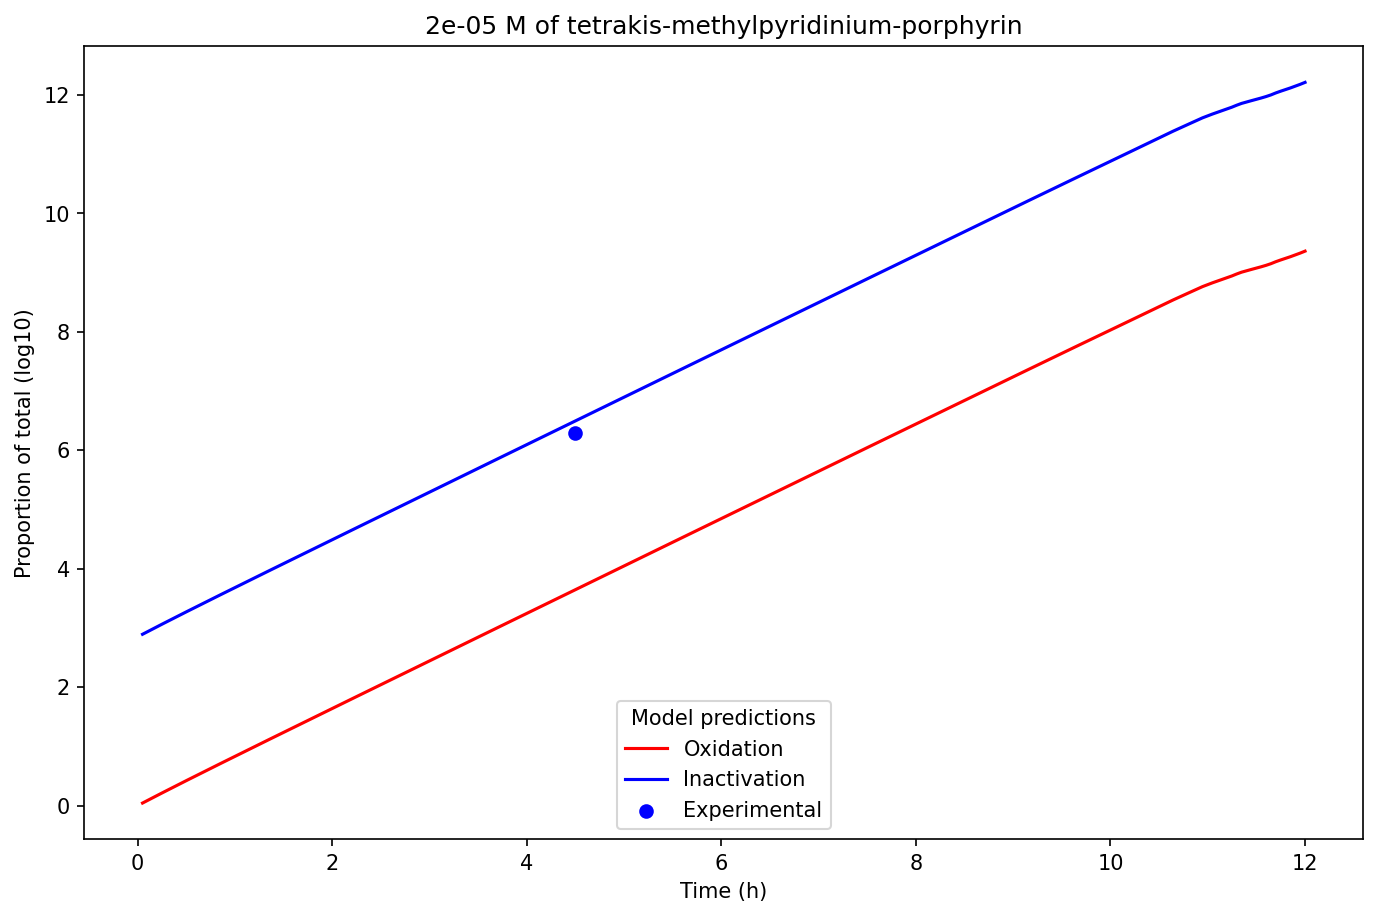

In [66]:
from scipy.constants import micro
from uncertainties import ufloat
from math import isclose
%run ../../pdipy/pdi.py
%matplotlib inline

# execute the simulation
for photosensitizer_molar in [5*micro, 10*micro, 20*micro]:
    figure_title = f'{round(photosensitizer_molar, 3)} M of tetrakis-methylpyridinium-porphyrin'
    # determine the experimental result
    actual_value = 4.5
    if photosensitizer_molar == 20*micro:
        log_reduction = 6.3          
    elif photosensitizer_molar == 5*micro:
        log_reduction = 3.6
    elif photosensitizer_molar == 10*micro:
        log_reduction = 5
        
    # execute the simulation
    pdi = PDI(verbose = False, jupyter = True)
    pdi.define_conditions(
        bacterial_specie = 'S_aureus', 
        bacterial_cfu_ml = 1E8,
        biofilm = True,
        photosensitizer = '5,10,15,20-tetrakis(1-methylpyridinium-4-yl)porphyrin tetra-iodide', 
        photosensitizer_characteristics = {
            'formula': {
                'value': 'C44_H38_N8_I4'   # mass with iodides included, sans iodides 678.84,
            },
            'dimensions':{
                'length (A)': total_length,
                'width (A)': total_length,
                'depth (A)': 1.5,
                'shape': 'disc',
            }
        },
        photosensitizer_molar = photosensitizer_molar,
        light_source = 'OSRAM 2\' 18W/840 lamps',
        light_characteristics = {
            "visible_proportion": {
              "value": (700-390)/(700-380),
            }
        }, 
        measurement = {
            'irradiance': 4
        }
    )
    pdi.simulate(
        export_name = f'Beirao_et_al, biofilm, {int(photosensitizer_molar/micro)} uM solution',
        figure_title = figure_title,
        experimental_data = {
            'x': [actual_value],
            'y': [log_reduction]
        },
        display_fa_oxidation = True,
        export_contents = True
    )
    display(pdi.processed_data)

    value, unit = pdi.parse_data(
        log_reduction = log_reduction
    )            
    if value is not None:
        tolerance = actual_value/2
        acceptable_range_float = ufloat(actual_value, tolerance)
        if isclose(value, actual_value, abs_tol=tolerance):
            print(f'The prediction of {value} is within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_value, 3)/actual_value*100}%-error')
        else:
            print(f'--> ERROR: The prediction of {value} is not within the {acceptable_range_float} tolerance of the actual value.\nA {round(value-actual_value, 3)/actual_value*100}%-error')
    
    print('\n\n\n\n')